In [1]:
import pandas as pd
data = pd.read_excel('Уровень занятости.xlsx')

data

,Year,White,Black or African American,Hispanic or Latino ethnicity
0,1973,60.8,60.2,60.2
1,1974,61.4,59.8,61.1
2,1975,61.5,58.8,60.8
3,1976,61.8,59.0,60.8
4,1977,62.5,59.8,61.6
5,1978,63.3,61.5,62.9
6,1979,63.9,61.4,63.6
7,1980,64.1,61.0,64.0
8,1981,64.3,60.8,64.1
9,1982,64.3,61.0,63.6


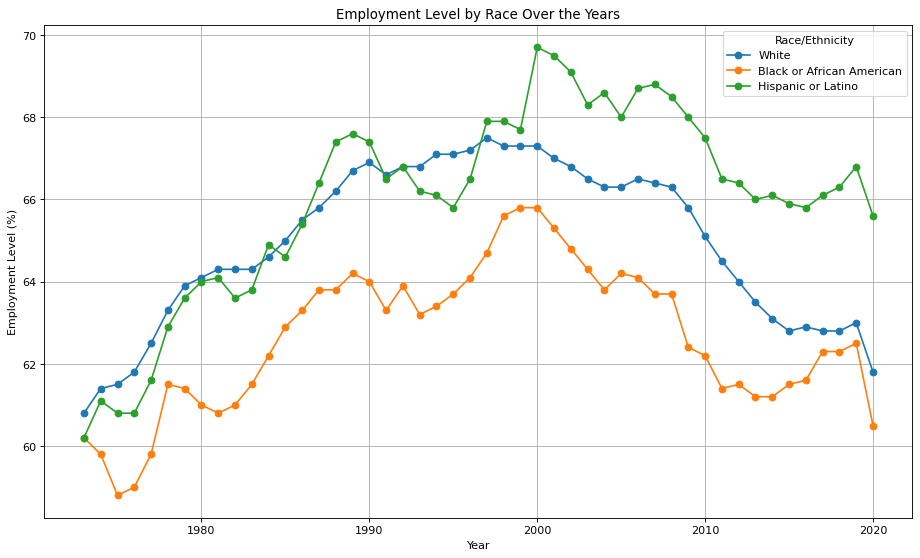

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8), dpi=80)

#Выводим графики по уровню занятости по каждой рассе в разрезе года
plt.plot(data['Year'], data['White'], label='White', marker='o')
plt.plot(data['Year'], data['Black or African American'], label='Black or African American', marker='o')
plt.plot(data['Year'], data['Hispanic or Latino ethnicity'], label='Hispanic or Latino', marker='o')

plt.title('Employment Level by Race Over the Years')
plt.xlabel('Year')
plt.ylabel('Employment Level (%)')
plt.legend(title='Race/Ethnicity')

plt.grid(True)

plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller

# Функция для выполенния теста Дики-Фуллера
def perform_adfuller_test(series, title):
    result = adfuller(series.dropna()) 
    print(f"Results of Dickey-Fuller Test for {title}:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    print("\n")

# Выполняем тест Дики-Фуллера
for column in data.columns[1:]:
    perform_adfuller_test(data[column], column)


Results of Dickey-Fuller Test for White:
Test Statistic: -1.2334128847453643
p-value: 0.6590597670972832
Critical Values:
	1%: -3.6209175221605827
	5%: -2.9435394610388332
	10%: -2.6104002410518627


Results of Dickey-Fuller Test for Black or African American:
Test Statistic: -1.2464012158096913
p-value: 0.6533235875276453
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338


Results of Dickey-Fuller Test for Hispanic or Latino ethnicity:
Test Statistic: -2.6615375546849456
p-value: 0.08093368390727118
Critical Values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064




In [4]:
# Creating a new DataFrame to store differenced data
differenced_data = data.set_index('Year').diff().dropna()

# Perform Dickey-Fuller test on each column of the differenced data
for column in differenced_data.columns:
    perform_adfuller_test(differenced_data[column], column)


Results of Dickey-Fuller Test for White:
Test Statistic: -0.13054132400085344
p-value: 0.9463102466974626
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383


Results of Dickey-Fuller Test for Black or African American:
Test Statistic: -3.267667742942213
p-value: 0.016387054399328995
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338


Results of Dickey-Fuller Test for Hispanic or Latino ethnicity:
Test Statistic: -5.575532945055989
p-value: 1.4350308064824689e-06
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675




In [5]:

double_differenced_white = differenced_data['White'].diff().dropna()
perform_adfuller_test(double_differenced_white, 'White (second differencing)')


Results of Dickey-Fuller Test for White (second differencing):
Test Statistic: -5.082530486870989
p-value: 1.5198357793115034e-05
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383




In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Строим модель ARIMA с параметрами (1, 1, 1)
model_revenue = ARIMA(data['White'], order=(1, 1, 1))
fitted_model_revenue = model_revenue.fit()

fitted_model_revenue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  White   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -10.569
Date:                Thu, 25 Apr 2024   AIC                             27.139
Time:                        22:15:41   BIC                             32.689
Sample:                             0   HQIC                            29.227
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8335      0.176      4.729      0.000       0.488       1.179
ma.L1         -0.3011      0.304     -0.990      0.322      -0.897       0.295
sigma2         0.0904      0.012      7.732      0.000       0.068       0.113
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                67.75
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                            -1.54
Prob(H) (two-sided):                  0.10   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
from statsmodels.tsa.arima.model import ARIMA

def forecast_arima(data, order, steps):
    # Обучаем модель ARIMA
    model = ARIMA(data, order=order)
    fitted_model = model.fit()

    # Строим рогноз на несколько периодов вперед
    forecast_result = fitted_model.forecast(steps=steps)
    
    # Доверительные интервалы для прогноза на несколько периодов вперед
    conf_int = fitted_model.get_forecast(steps=steps).conf_int()
    
    # Структурирование прогнозов и доверительных интервалов
    forecast_values = forecast_result.tolist()
    confidence_intervals = conf_int.values.tolist()
    
    return forecast_values, confidence_intervals

# Прогноз уровня занятости для белых на 15 лет вперед
white_forecast, white_confidence_intervals = forecast_arima(data['White'], order=(1, 1, 1), steps=15)

# Прогноз уровня занятости для афроамериканцев на 15 лет вперед
black_forecast, black_confidence_intervals = forecast_arima(data['Black or African American'], order=(1, 1, 1), steps=15)

# Прогноз уровня занятости для латиноамериканцев на 15 лет вперед
latino_forecast, latino_confidence_intervals = forecast_arima(data['Hispanic or Latino ethnicity'], order=(1, 1, 1), steps=15)

# Вывод результатов
forecast_output = {
    "White Forecast": white_forecast,
    "White Confidence Intervals": white_confidence_intervals,
    "Black Forecast": black_forecast,
    "Black Confidence Intervals": black_confidence_intervals,
    "Latino Forecast": latino_forecast,
    "Latino Confidence Intervals": latino_confidence_intervals
}

forecast_output


{'White Forecast': [61.19150291414893,
  60.68429804880892,
  60.26152400205278,
  59.90912617067405,
  59.61538952218941,
  59.37054914299236,
  59.166465615810395,
  58.99635443478861,
  58.854560462936945,
  58.736369934056334,
  58.63785374937895,
  58.555736859512145,
  58.487289389449444,
  58.43023588723347,
  58.38267967935426],
 'White Confidence Intervals': [[60.6020938887843, 61.78091193951355],
  [59.60577435118723, 61.76282174643061],
  [58.67408401088217, 61.84896399322339],
  [57.80385108146997, 62.01440125987813],
  [56.99240363913982, 62.238375405239],
  [56.2360806300533, 62.50501765593142],
  [55.5306655461174, 62.80226568550339],
  [54.8717845984837, 63.120924271093514],
  [54.25515552073877, 63.45396540513512],
  [53.67672680709841, 63.79601306101426],
  [53.13274733684995, 64.14296016190794],
  [52.61979349346537, 64.49168022555891],
  [52.13477096431037, 64.83980781458851],
  [51.674901964537696, 65.18556980992925],
  [51.23770458314388, 65.52765477556464]],
 'Bl

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Функция для проведения прогноза с помощью ARIMA
def forecast_arima(data, order, steps):
    # Обучаем модель ARIMA
    model = ARIMA(data, order=order)
    fitted_model = model.fit()

    # Прогноз на несколько периодов вперед
    forecast_result = fitted_model.forecast(steps=steps)
    
    # Доверительные интервалы для прогноза
    conf_int = fitted_model.get_forecast(steps=steps).conf_int()
    
    # Структурирование прогнозов и доверительных интервалов
    forecast_values = forecast_result.tolist()
    confidence_intervals = conf_int.values.tolist()
    
    return forecast_values, confidence_intervals

# Устанавливаем параметры модели
order = (1, 1, 1)
steps = 15

# Прогноз для каждой группы
white_forecast, white_confidence_intervals = forecast_arima(data['White'], order, steps)
black_forecast, black_confidence_intervals = forecast_arima(data['Black or African American'], order, steps)
latino_forecast, latino_confidence_intervals = forecast_arima(data['Hispanic or Latino ethnicity'], order, steps)

# Создание временной шкалы для прогнозов
last_year = data['Year'].iloc[-1]
years_forecast = np.arange(last_year + 1, last_year + 1 + steps)

# Сохранение результатов в словарь
forecast_output = {
    "Years Forecast": years_forecast,
    "White Forecast": white_forecast,
    "White Confidence Intervals": white_confidence_intervals,
    "Black Forecast": black_forecast,
    "Black Confidence Intervals": black_confidence_intervals,
    "Latino Forecast": latino_forecast,
    "Latino Confidence Intervals": latino_confidence_intervals
}

forecast_output


{'Years Forecast': array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
        2032, 2033, 2034, 2035]),
 'White Forecast': [61.19150291414893,
  60.68429804880892,
  60.26152400205278,
  59.90912617067405,
  59.61538952218941,
  59.37054914299236,
  59.166465615810395,
  58.99635443478861,
  58.854560462936945,
  58.736369934056334,
  58.63785374937895,
  58.555736859512145,
  58.487289389449444,
  58.43023588723347,
  58.38267967935426],
 'White Confidence Intervals': [[60.6020938887843, 61.78091193951355],
  [59.60577435118723, 61.76282174643061],
  [58.67408401088217, 61.84896399322339],
  [57.80385108146997, 62.01440125987813],
  [56.99240363913982, 62.238375405239],
  [56.2360806300533, 62.50501765593142],
  [55.5306655461174, 62.80226568550339],
  [54.8717845984837, 63.120924271093514],
  [54.25515552073877, 63.45396540513512],
  [53.67672680709841, 63.79601306101426],
  [53.13274733684995, 64.14296016190794],
  [52.61979349346537, 64.49168022555891],
  [52.

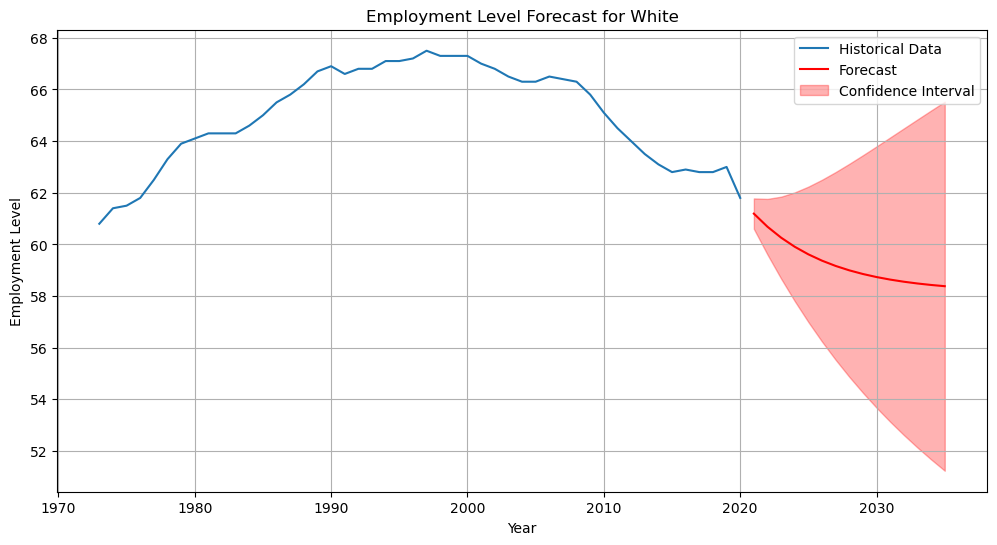

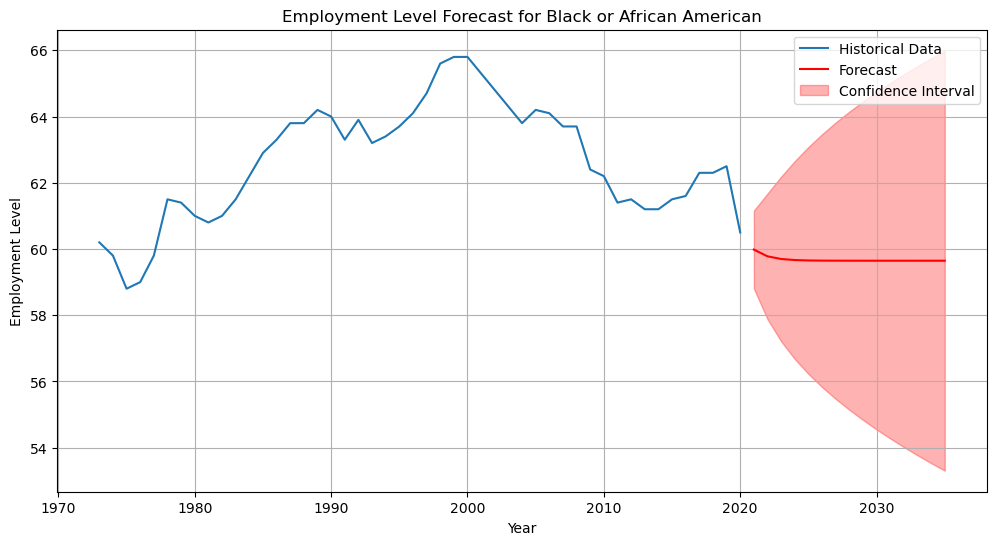

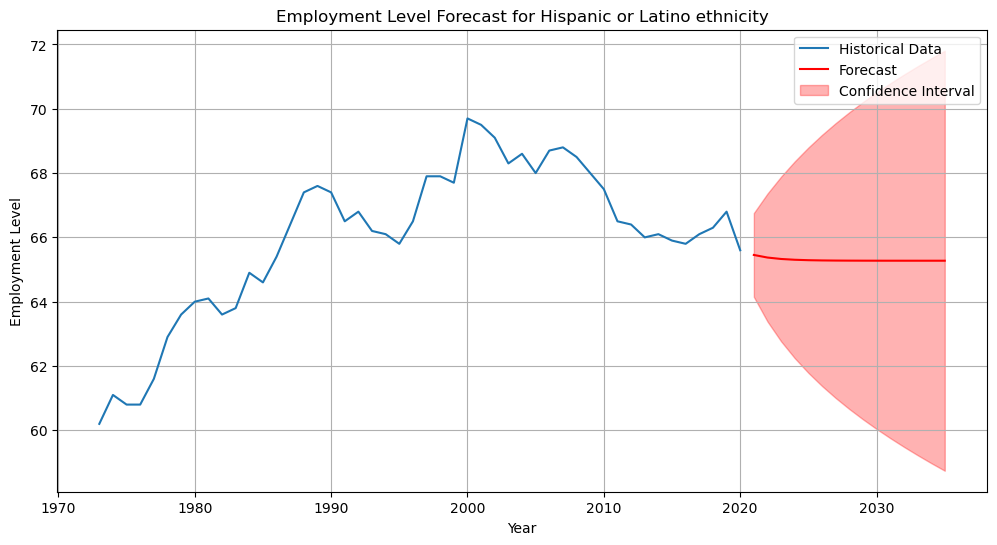

In [9]:
import matplotlib.pyplot as plt

# Функция для визуализации данных и прогнозов
def plot_forecast(history, forecast, conf_intervals, title, years_forecast, history_years):
    plt.figure(figsize=(12, 6))
    plt.plot(history_years, history, label='Historical Data')
    plt.plot(years_forecast, forecast, label='Forecast', color='red')
    plt.fill_between(years_forecast, 
                     [ci[0] for ci in conf_intervals], [ci[1] for ci in conf_intervals], 
                     color='red', alpha=0.3, label='Confidence Interval')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Employment Level')
    plt.legend()
    plt.grid(True)
    plt.show()

# Визуализация прогнозов для всех трёх групп
plot_forecast(data['White'], forecast_output['White Forecast'], forecast_output['White Confidence Intervals'],
              'Employment Level Forecast for White', forecast_output['Years Forecast'], data['Year'])
plot_forecast(data['Black or African American'], forecast_output['Black Forecast'], forecast_output['Black Confidence Intervals'],
              'Employment Level Forecast for Black or African American', forecast_output['Years Forecast'], data['Year'])
plot_forecast(data['Hispanic or Latino ethnicity'], forecast_output['Latino Forecast'], forecast_output['Latino Confidence Intervals'],
              'Employment Level Forecast for Hispanic or Latino ethnicity', forecast_output['Years Forecast'], data['Year'])


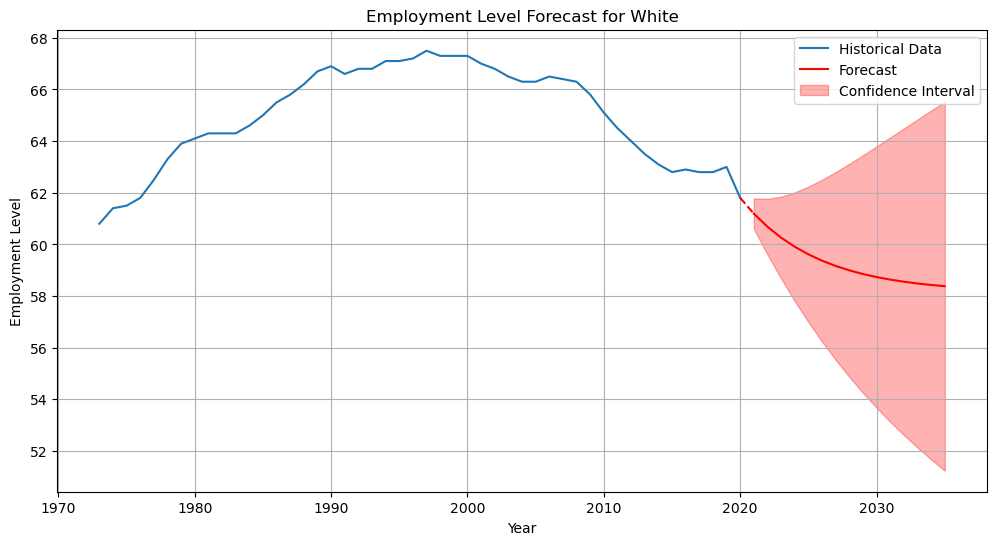

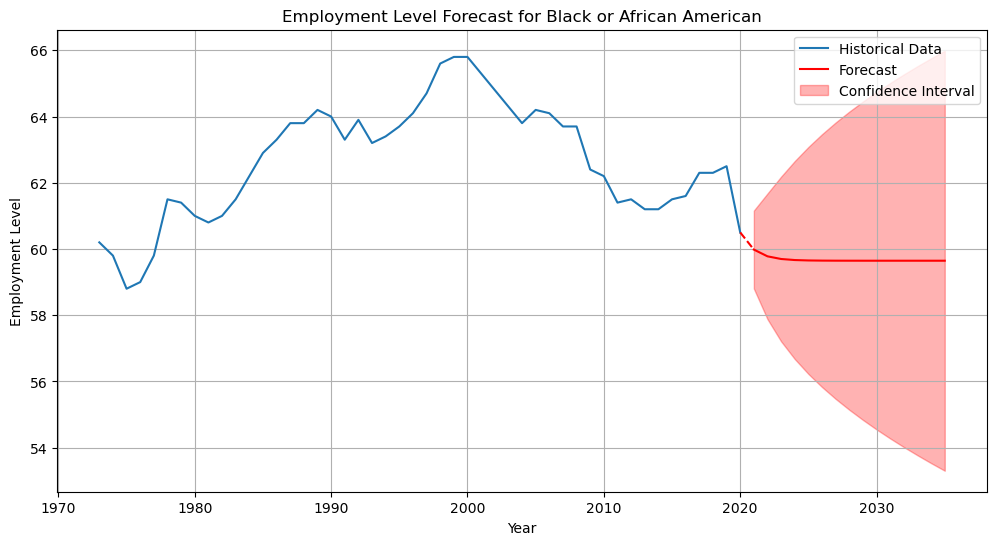

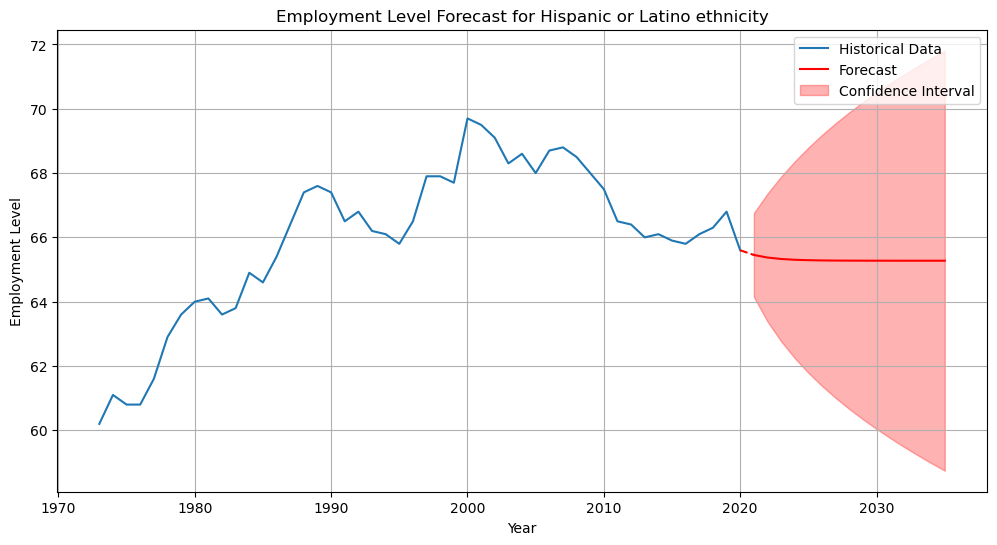

In [10]:
# Функция для визуализации данных и прогнозов с соединением последней точки исторических данных и первой точки прогноза
def plot_forecast_with_connection(history, forecast, conf_intervals, title, years_forecast, history_years):
    plt.figure(figsize=(12, 6))
    plt.plot(history_years, history, label='Historical Data')
    plt.plot(years_forecast, forecast, label='Forecast', color='red')
    # Соединение последней точки исторических данных с первой точкой прогноза
    plt.plot([history_years.iloc[-1], years_forecast[0]], [history.iloc[-1], forecast[0]], color='red', linestyle='--')
    plt.fill_between(years_forecast, 
                     [ci[0] for ci in conf_intervals], [ci[1] for ci in conf_intervals], 
                     color='red', alpha=0.3, label='Confidence Interval')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Employment Level')
    plt.legend()
    plt.grid(True)
    plt.show()

# Перерисовываем графики с соединительной линией
plot_forecast_with_connection(data['White'], forecast_output['White Forecast'], forecast_output['White Confidence Intervals'],
                              'Employment Level Forecast for White', forecast_output['Years Forecast'], data['Year'])
plot_forecast_with_connection(data['Black or African American'], forecast_output['Black Forecast'], forecast_output['Black Confidence Intervals'],
                              'Employment Level Forecast for Black or African American', forecast_output['Years Forecast'], data['Year'])
plot_forecast_with_connection(data['Hispanic or Latino ethnicity'], forecast_output['Latino Forecast'], forecast_output['Latino Confidence Intervals'],
                              'Employment Level Forecast for Hispanic or Latino ethnicity', forecast_output['Years Forecast'], data['Year'])


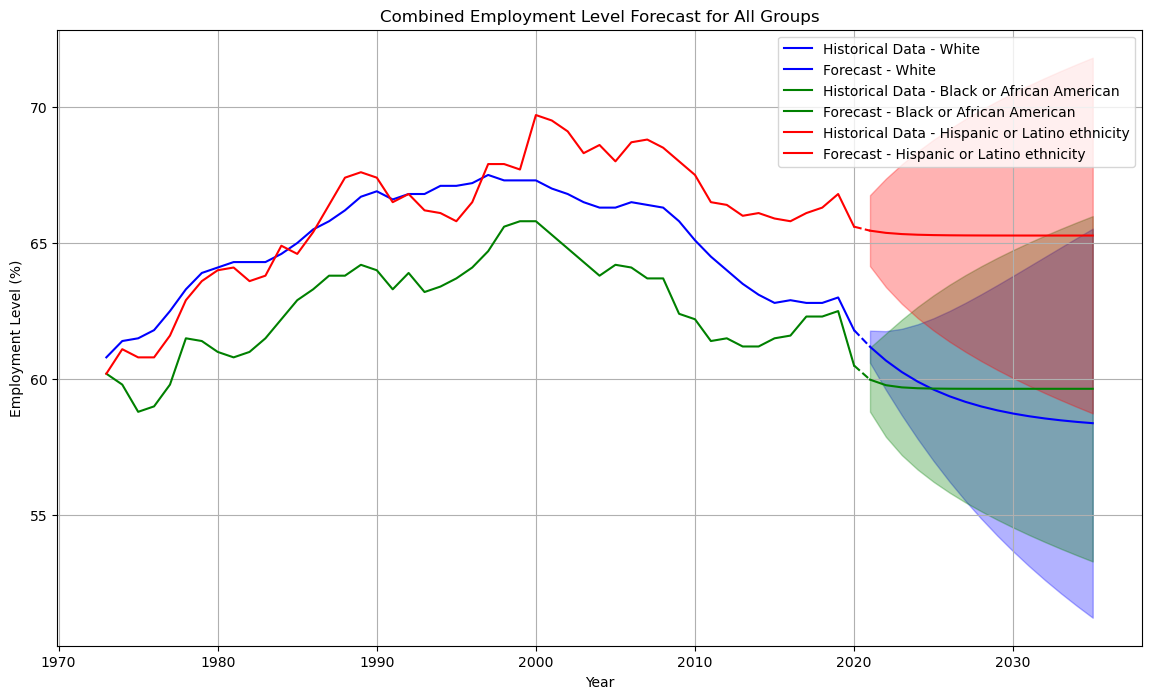

In [11]:
# Создание одного графика для всех трех групп с корректными ключами
plt.figure(figsize=(14, 8))

# Названия групп и соответствующие цвета
group_colors = ['blue', 'green', 'red']
group_labels = ['White', 'Black or African American', 'Hispanic or Latino ethnicity']
forecast_labels = ['White Forecast', 'Black Forecast', 'Latino Forecast']
confidence_intervals_labels = ['White Confidence Intervals', 'Black Confidence Intervals', 'Latino Confidence Intervals']

# Отрисовка графиков для каждой группы
for color, group_label, forecast_label, ci_label in zip(group_colors, group_labels, forecast_labels, confidence_intervals_labels):
    # Исторические данные
    plt.plot(data['Year'], data[group_label], label=f'Historical Data - {group_label}', color=color)
    # Прогнозы
    plt.plot(forecast_output['Years Forecast'], forecast_output[forecast_label], label=f'Forecast - {group_label}', color=color)
    # Доверительные интервалы
    plt.fill_between(forecast_output['Years Forecast'], 
                     [ci[0] for ci in forecast_output[ci_label]], 
                     [ci[1] for ci in forecast_output[ci_label]], 
                     color=color, alpha=0.3)
    # Соединительная линия
    plt.plot([data['Year'].iloc[-1], forecast_output['Years Forecast'][0]], 
             [data[group_label].iloc[-1], forecast_output[forecast_label][0]], 
             color=color, linestyle='--')

plt.title('Combined Employment Level Forecast for All Groups')
plt.xlabel('Year')
plt.ylabel('Employment Level (%)')
plt.legend()
plt.grid(True)
plt.show()


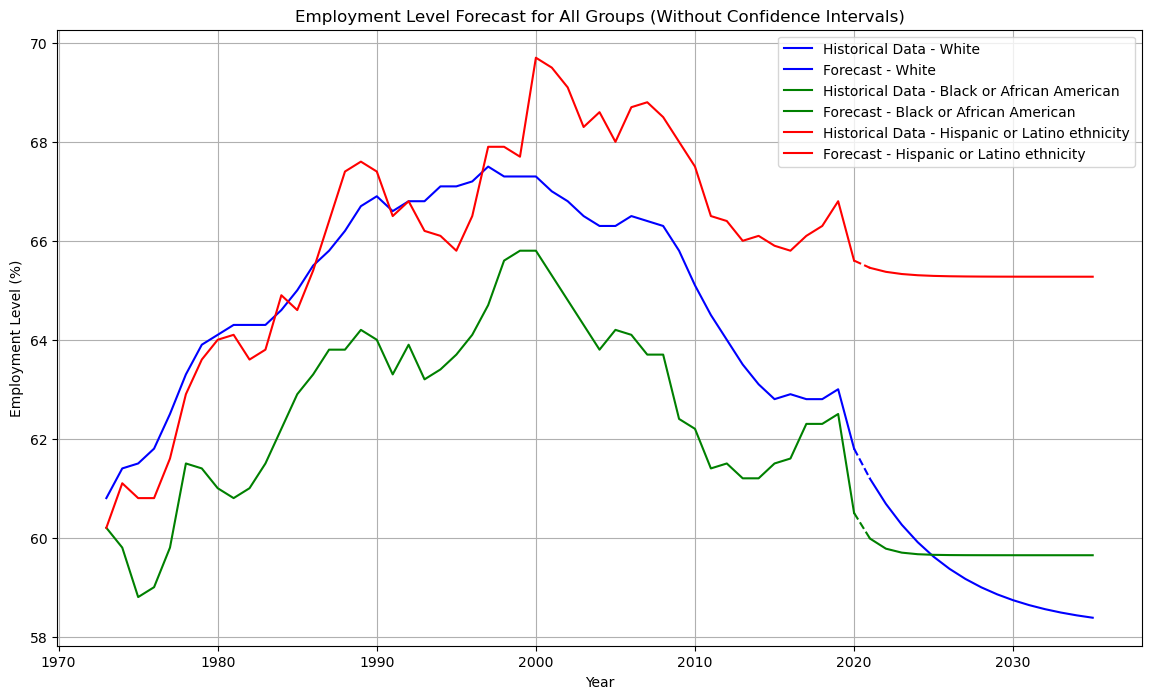

In [12]:
# Создание графика без доверительных интервалов
plt.figure(figsize=(14, 8))

# Отрисовка графиков для каждой группы без доверительных интервалов
for color, group_label, forecast_label in zip(group_colors, group_labels, forecast_labels):
    # Исторические данные
    plt.plot(data['Year'], data[group_label], label=f'Historical Data - {group_label}', color=color)
    # Прогнозы
    plt.plot(forecast_output['Years Forecast'], forecast_output[forecast_label], label=f'Forecast - {group_label}', color=color)
    # Соединительная линия
    plt.plot([data['Year'].iloc[-1], forecast_output['Years Forecast'][0]], 
             [data[group_label].iloc[-1], forecast_output[forecast_label][0]], 
             color=color, linestyle='--')

plt.title('Employment Level Forecast for All Groups (Without Confidence Intervals)')
plt.xlabel('Year')
plt.ylabel('Employment Level (%)')
plt.legend()
plt.grid(True)
plt.show()


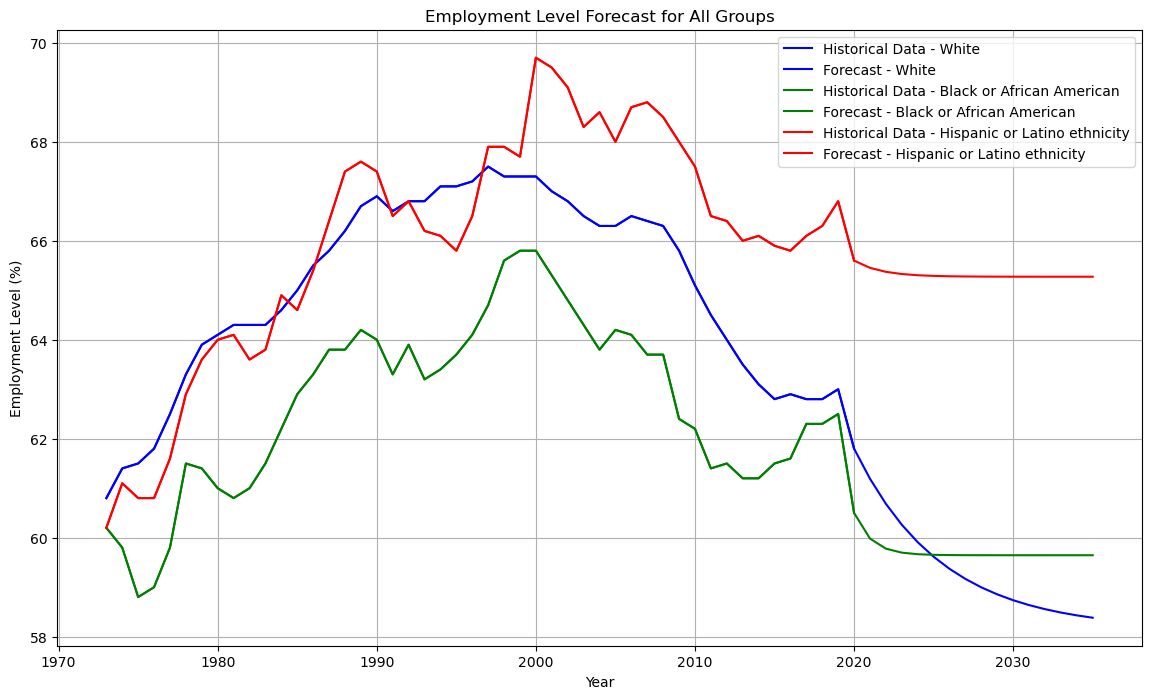

In [13]:
# Создание графика без доверительных интервалов и с непрерывной линией между 2020 и 2021 годами
plt.figure(figsize=(14, 8))

# Отрисовка графиков для каждой группы без разрыва
for color, group_label, forecast_label in zip(group_colors, group_labels, forecast_labels):
    # Исторические данные
    plt.plot(data['Year'], data[group_label], label=f'Historical Data - {group_label}', color=color)
    # Прогнозы, включая соединение 2020 с 2021 годом
    full_years = np.append(data['Year'], forecast_output['Years Forecast'])
    full_data = np.append(data[group_label], forecast_output[forecast_label])
    plt.plot(full_years, full_data, label=f'Forecast - {group_label}', color=color)

plt.title('Employment Level Forecast for All Groups')
plt.xlabel('Year')
plt.ylabel('Employment Level (%)')
plt.legend()
plt.grid(True)
plt.show()
